# Ciência dos Dados - Avaliação Intermediária - 28/Set/2017

### Nome:

In [9]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from numpy import mean, var, arange
from math import *

In [10]:
data2013 = pd.read_csv("maratona2013.csv")

# Maratona de 2013

Vamos trabalhar com dados de uma Maratona acontecida em 2013. O dataset contém as informações dos participantes, segundo o dicionário abaixo.

#### Dicionário de dados

|Coluna | Descrição|
|:---|---:|
| 25k | Tempo para completar 25k |
| age | idade |
| name | nome do corredor |
| division | categoria ou divisão do corredor |
| 10k | tempo para completar 10k |
| gender | gênero |
| half | tempo para meia maratona |
| official | tempo final oficial |
| bib | ? |
| ctz | Cidadania do corredor |
| country | em que país vive |
| overall | Colocação geral |
| pace | ritmo |
| state | estado de residência |


### Q1. Histograma

(0,8 Ponto) Plote um histograma normalizado do tempo oficial de término da corrida

Plote uma função de densidade de probabilidade normal sobre o histograma. Tome uma decisão sobre como chegar à média e à variância

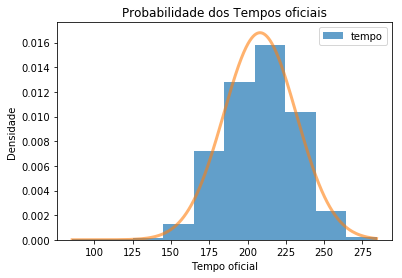

In [108]:
x = sorted(data2013.official)
m = data2013.official.mean()
dp = data2013.official.std()
plot = data2013.official.plot.hist(title='Probabilidade dos Tempos oficiais', alpha=0.7,label='tempo', normed=1)
plt.ylabel('Densidade')
plt.xlabel('Tempo oficial')
plt.legend()
plt.plot(x, stats.norm.pdf(x, loc=m, scale=dp), lw=3, alpha=0.6)

(0,4 Ponto) Responda:
* Em sua opinião (ainda sem um método de verificação mais potente) a curva parece normal?
* Como você faria para se assegurar com mais certeza se é ou não uma normal? Não é preciso implementar.

R.: A curva parece normal, pois o histograma formado pelos dados parece com o formato dessa curva. Isso é visível pela presença de um pico que se localiza próximo à metade da aplitude do gráfico. Eu calcularia a média e a mediana e me certificaria de serem próximas.

### Q2. Probabilidade

#### Q2.1. Se selecionarmos um competidor a esmo, qual a probabilidade dele ter feito mais de 220 minutos?

a) (0,3 Ponto) Resolva usando os dados.

In [109]:
contagem = 0
for i in x:
    if i > 220:
        contagem += 1
pro220 = contagem/len(x)
pro220

0.3247339767384311

b) (0,3 Ponto) Assumindo que a distribuição do tempo final oficial seja uma normal, resolva usando a função cdf(). 

In [110]:
1 - stats.norm.cdf(220, loc=m, scale=dp)

0.30900142479819459

#### Q2.2. Apenas os 20% mais rápidos estarão classificados para o mundial, qual seria o tempo mínimo necessário para obter o índice?
a) (0,3 Ponto) Resolva usando os dados.

In [111]:
p20 = len(x)*0.2
p80 = len(x)*0.8

for i in range(len(x)):
    if i > p80:
        tempmin = x[i]
tempmin

284.23000000000002

b) (0,3 Ponto) Assumindo que a distribuição do tempo final oficial seja uma normal, resolva usando a função ppf(). 

In [112]:
stats.norm.ppf(0.8, loc=m, scale=dp)

228.14259538896101

#### Q2.3 (0,2 Ponto) Explique as diferenças entre os resultados teóricos (modelo) e amostrais (dados) nas questões Q1.1 e Q.2.

R.: As diferenças acontecem, pois os modelos, apesar de nos ajudarem a prever e entender os acontecimentos reais, dificilmente são exatamentes iguais aos dados coletados. A realidade pode seguir certos padrões, mas nem sempre eles são perfeitos e, muitas vezes a coleta de dados fica submetida à erros humanos.

### Q3. Probabilidade Condicional

(0,8 Ponto) Dado um participante escolhido no grupo da terceira idade (acima de 60 anos), qual a probabildade dele ter mais de 75 anos?

Obs: você pode fazer a conta manualmente com os dados da questão anterior ou usar os dados brutos originais. - ignorar

In [113]:
y = data2013[data2013.age >= 60]
y = sorted(y.age)
mais75 = 0
for i in y:
    if i > 75:
        mais75 += 1
pmais75 = mais75/len(y)
pmais75

0.004273504273504274

### Q4. Análise Exploratória

(1,3 Ponto) Como você verificaria a seguinte afirmação: *Pessoas com mais idade tendem a ir mais devagar*?

Obs.: Se ajudar, assuma uma idade a partir da qual uma pessoa tem *mais idade* e também assuma um tempo de corrida que quer dizer *mais devagar*

In [114]:
data2013.loc[(data2013.age >= 50),'qidade'] = 'mais idade'
data2013.loc[(data2013.age < 50),'qidade'] = 'menos idade'
data2013.loc[(data2013.official >= 240),'tempo'] = 'mais devagar'
data2013.loc[(data2013.official < 240),'tempo'] = 'mais rapido'

Md_Maii = len(data2013[(data2013.qidade == 'mais idade') & (data2013.tempo == 'mais devagar')])/len(data2013[data2013.qidade == 'mais idade'])
Md_Meni = len(data2013[(data2013.qidade == 'menos idade') & (data2013.tempo == 'mais devagar')])/len(data2013[data2013.qidade == 'menos idade'])
Mr_Maii = len(data2013[(data2013.qidade == 'mais idade') & (data2013.tempo == 'mais rapido')])/len(data2013[data2013.qidade == 'mais idade'])
Mr_Meni = len(data2013[(data2013.qidade == 'menos idade') & (data2013.tempo == 'mais rapido')])/len(data2013[data2013.qidade == 'menos idade'])
print('A probabilidade de uma pessoal com mais idade ser mais devagar é: {0}'.format(Md_Maii))
print('A probabilidade de uma pessoal com menos idade ser mais devagar é: {0}'.format(Md_Meni))
print('A probabilidade de uma pessoal com mais idade ser mais rápida é: {0}'.format(Mr_Maii))
print('A probabilidade de uma pessoal com menos idade ser mais rápida é: {0}'.format(Mr_Meni))
print('ou, seja, uma pessoa com menos idade tem probabilidade maior de ser mais devagar que uma pessoa com menos idade e o inverso se aplica em relação à ser mais rápido.')

A probabilidade de uma pessoal com mais idade ser mais devagar é: 0.15672215108834828
A probabilidade de uma pessoal com menos idade ser mais devagar é: 0.05563259645974386
A probabilidade de uma pessoal com mais idade ser mais rápida é: 0.8432778489116517
A probabilidade de uma pessoal com menos idade ser mais rápida é: 0.9443674035402562
ou, seja, uma pessoa com menos idade tem probabilidade maior de ser mais devagar que uma pessoa com menos idade e o inverso se aplica em relação à ser mais rápido.


### Q5. Teorema de Bayes

(1,3 Ponto) Dado um competidor do Japão (JPN) e com idade superior a 60 anos, é mais provável que seja homem ou mulher?

$$P(Homem\,|\,Japão\,\cap\,idade>60) > P(Mulher\,|\,Japão\,\cap\,idade>60)?$$

Caso necessário, pode assumir independência entre idade e país.

In [115]:
PJ60 = len(data2013[((data2013.country == 'JPN') & (data2013.age > 60))])/len(data2013)
PH = len(data2013[data2013.gender == 'M'])/len(data2013)
PM = len(data2013[data2013.gender == 'F'])/len(data2013)
PJ60H = len(data2013[((data2013.gender == 'M') & (data2013.country == 'JPN') & (data2013.age > 60))])/len(data2013)
PJ60M = len(data2013[((data2013.gender == 'F') & (data2013.country == 'JPN') & (data2013.age > 60))])/len(data2013)
PHJ60 = PJ60H*PH/PJ60
PMJ60 = PJ60M*PM/PJ60
PHJ60

0.5689185845087851

### Q6. Análise Exploratória

(1,0 Ponto) Quem é a mulher mais rápida? Embasar a resposta com código Python, busca manual não será aceita.

Obs: É sabido que não há empate entre as participantes.

In [116]:
rapida = 1000
nome = ''
nomes = data2013.name
genero = data2013.gender
tempo = data2013.official

for i in range(len(genero)):
    if genero[i] == 'F':
        if tempo[i] < rapida:
            rapida = tempo[i]
            nome = nomes[i]
print('A corredora mais rápida é {0}'.format(nome))



A corredora mais rápida é McFadden, Tatyana
